In [43]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data)




In [44]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [45]:
boston.data.shape

(506, 13)

In [46]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [47]:
print (boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [48]:
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [49]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [50]:
boston.target[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [51]:
bos["PRICE"] = boston.target

In [52]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [53]:
#Skikit learning
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)
#linear object
lm = LinearRegression()
lm.fit(X,bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [54]:
#Intercept and coefficients
print("Estimated intercept coefficient:",lm.intercept_)

Estimated intercept coefficient: 36.49110328036171


In [55]:
print("number of coefficients:",len(lm.coef_))

number of coefficients: 13


In [56]:
#column 0 is 'features' and 1 is 'estimated coefficients'
pd.DataFrame(list(zip(X.columns, lm.coef_)))

,0,1
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


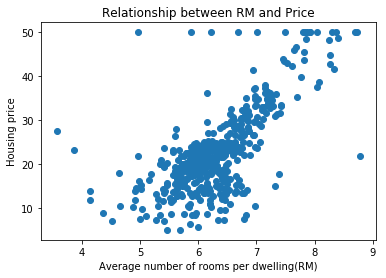

In [57]:
#plot between true housing prices and true RM
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("Average number of rooms per dwelling(RM)")
plt.ylabel("Housing price")
plt.title("Relationship between RM and Price")
plt.show()

In [58]:
#predicting prices for first 25 houses
lm.predict(X)[0:25]

array([30.00821269, 25.0298606 , 30.5702317 , 28.60814055, 27.94288232,
       25.25940048, 23.00433994, 19.5347558 , 11.51696539, 18.91981483,
       18.9958266 , 21.58970854, 20.90534851, 19.55535931, 19.2837957 ,
       19.30000174, 20.52889993, 16.9096749 , 16.17067411, 18.40781636,
       12.52040454, 17.67104565, 15.82934891, 13.80368317, 15.67708138])

Text(0.5,1,'True prices vs Predicted prices:')

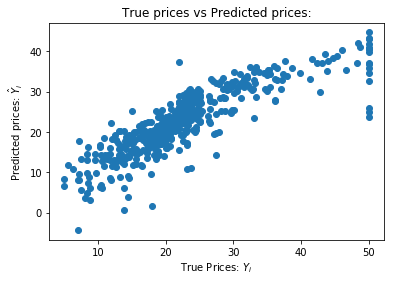

In [65]:
#plot between true prices and predicted prices
plt.scatter(bos.PRICE, lm.predict(X))
plt.xlabel("True Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("True prices vs Predicted prices:")

In [60]:
#Mean Squared Error
mseFull = np.mean((bos.PRICE - lm.predict(X))**2)
print(mseFull)

21.897779217687496


In [61]:
#Train-test split
from sklearn.cross_validation import cross_val_score
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X, bos.PRICE, test_size=0.33, random_state= 5)


print("Fit a model X_train, and calculate MSE with Y_train:", np.mean((Y_train-lm.predict(X_train))**2))
print("Fit a model X_train, and calculate MSE with X_test, Y_test:",np.mean(Y_test - lm.predict(X_test))**2)

Fit a model X_train, and calculate MSE with Y_train: 20.08073988170908
Fit a model X_train, and calculate MSE with X_test, Y_test: 0.13807544449442505


Text(0,0.5,'Residuals')

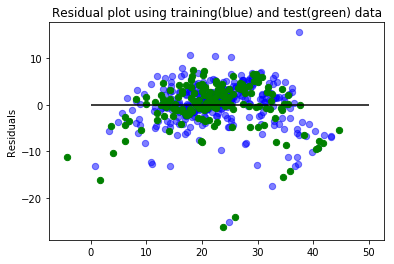

In [62]:
#Residuals vs Residual plot (blue) Training and (green) tezt data
plt.scatter(lm.predict(X_train),lm.predict(X_train) - Y_train,c='b',s=40,alpha=0.5)
plt.scatter(lm.predict(X_test),lm.predict(X_test) - Y_test,c='g',s=40)
plt.hlines(y = 0, xmin = 0, xmax = 50)
plt.title("Residual plot using training(blue) and test(green) data")
plt.ylabel("Residuals")
